# Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
data = pd.read_csv("E:/My projects/telco.csv")

In [3]:
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,"1,024.10",3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,"1,910.88",2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,"2,995.07",2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,"3,102.36",2,Churned,Yes,67,2793,Price,Extra data charges


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [5]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,"7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00"
mean,46.51,0.47,"93,486.07",36.20,-119.76,"22,139.60",1.95,32.39,22.96,20.52,64.76,"2,280.38",1.96,6.86,749.10,"3,034.38",3.24,58.51,"4,400.30"
std,16.75,0.96,"1,856.77",2.47,2.15,"21,152.39",3.00,24.54,15.45,20.42,30.09,"2,266.22",7.90,25.10,846.66,"2,865.20",1.20,21.17,"1,183.06"
min,19.00,0.00,"90,001.00",32.56,-124.30,11.00,0.00,1.00,0.00,0.00,18.25,18.80,0.00,0.00,0.00,21.36,1.00,5.00,"2,003.00"
25%,32.00,0.00,"92,101.00",33.99,-121.79,"2,344.00",0.00,9.00,9.21,3.00,35.50,400.15,0.00,0.00,70.55,605.61,3.00,40.00,"3,469.00"
50%,46.00,0.00,"93,518.00",36.21,-119.60,"17,554.00",0.00,29.00,22.89,17.00,70.35,"1,394.55",0.00,0.00,401.44,"2,108.64",3.00,61.00,"4,527.00"
75%,60.00,0.00,"95,329.00",38.16,-117.97,"36,125.00",3.00,55.00,36.39,27.00,89.85,"3,786.60",0.00,0.00,"1,191.10","4,801.15",4.00,75.50,"5,380.50"
max,80.00,9.00,"96,150.00",41.96,-114.19,"105,285.00",11.00,72.00,49.99,85.00,118.75,"8,684.80",49.79,150.00,"3,564.72","11,979.34",5.00,96.00,"6,500.00"


In [6]:
data.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [7]:
data.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Country                                 1
State                                   1
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Population                           1569
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                  

In [24]:
''' Since some of these columns have only 1 unique value and 
some of them are not required for this analysis 
so we are removing them from the dataset '''

columns_to_drop = ['Country', 'State', 'Quarter', 'Zip Code', 'Latitude', 'Longitude','City', 'Churn Category', 'Churn Reason', 'Churn Score', 'Customer ID', 'Customer Status', 'CLTV']
existing_columns = data.columns.intersection(columns_to_drop)
data = data.drop(existing_columns, axis=1)

In [25]:
data.isnull().sum().sum()

0

In [26]:
#code taken from github
features_cat = list(data.select_dtypes(exclude = ['int64','float64']))
features_num = list(data.select_dtypes(include = ['int64','float64']))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Step 1: Identify categorical features based on cardinality
categorical_features = data.select_dtypes(include=['object']).columns
onehot_features = [col for col in categorical_features if data[col].nunique() > 2 and col != 'Churn Label']
label_features = [col for col in categorical_features if data[col].nunique() == 2 and col != 'Churn Label']

# Step 2: Split the data into training and test sets
X = data.drop(columns=['Churn Label'])  # Features
y = data['Churn Label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply One-Hot Encoding to columns with more than 2 unique values
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data only
encoded_train_array = onehot_encoder.fit_transform(X_train[onehot_features])

# Transform the test data using the fitted encoder
encoded_test_array = onehot_encoder.transform(X_test[onehot_features])

# Get the new column names for the one-hot encoded features
encoded_columns = onehot_encoder.get_feature_names_out(onehot_features)

# Convert the encoded arrays to DataFrames
encoded_train_df = pd.DataFrame(encoded_train_array, columns=encoded_columns, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test_array, columns=encoded_columns, index=X_test.index)

# Step 4: Apply Label/Ordinal Encoding to columns with exactly 2 unique values
label_encoders = {}
for col in label_features:
    if col in X_train.columns:  # Ensure the column is in the DataFrame
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le  # Store the label encoder for future use if needed

# Step 5: Drop the original categorical features that were one-hot encoded
X_train = X_train.drop(onehot_features, axis=1)
X_test = X_test.drop(onehot_features, axis=1)

# Join the encoded DataFrames with the original DataFrames
X_train = X_train.join(encoded_train_df)
X_test = X_test.join(encoded_test_df)

# Output the transformed training and test sets
print("Transformed Training Set:")
print(X_train.head(2).T)

print("\nTransformed Test Set:")
print(X_test.head(2).T)

Transformed Training Set:
                                    4626      4192
Gender                              1.00      0.00
Age                                43.00     62.00
Under 30                            0.00      0.00
Senior Citizen                      0.00      0.00
Married                             0.00      0.00
Dependents                          0.00      1.00
Number of Dependents                0.00      2.00
Population                        816.00 40,137.00
Referred a Friend                   0.00      0.00
Number of Referrals                 0.00      0.00
Tenure in Months                   16.00     12.00
Phone Service                       1.00      1.00
Avg Monthly Long Distance Charges   5.79     16.96
Multiple Lines                      1.00      1.00
Internet Service                    1.00      1.00
Avg Monthly GB Download             4.00     18.00
Online Security                     0.00      0.00
Online Backup                       1.00      1.00
Devic

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Maximum depth of each tree
    min_samples_split=10,      # Minimum number of samples required to split an internal node
    min_samples_leaf=5,        # Minimum number of samples required to be at a leaf node
    random_state=42            # Ensure reproducibility
)

# Step 2: Fit the model on the training data
rf_model.fit(X_train, y_train)

# Step 3: Predict on the test data
y_test_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate the model
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Random Forest Test Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Optional: Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Test Accuracy: 0.9552874378992193
Random Forest Test Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.99      0.97      1035
         Yes       0.98      0.85      0.91       374

    accuracy                           0.96      1409
   macro avg       0.96      0.92      0.94      1409
weighted avg       0.96      0.96      0.95      1409

Random Forest Confusion Matrix:
[[1029    6]
 [  57  317]]


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean()}')


Cross-Validation Accuracy: 0.9629032893565179


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
# Step 1: Convert target labels to numeric format using LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training target and transform both training and test targets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,          # Number of trees
    max_depth=4,               # Maximum depth of each tree
    learning_rate=0.1,         # Step size shrinkage used to prevent overfitting
    subsample=0.8,             # Subsample ratio of the training instances
    colsample_bytree=0.8,      # Subsample ratio of columns when constructing each tree
    random_state=42,           # Ensure reproducibility
    use_label_encoder=False,   # To avoid label encoder warning in recent versions
    eval_metric='logloss'      # Evaluation metric
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred_xgb = xgb_model.predict(X_test)

# Decode the predicted labels to original label names ('No', 'Yes')
y_test_pred_xgb_decoded = label_encoder.inverse_transform(y_test_pred_xgb)

# Evaluate the model
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_test_pred_xgb_decoded))
print("XGBoost Test Classification Report:")
print(classification_report(y_test, y_test_pred_xgb_decoded))

# Optional: Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb_decoded)
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)

XGBoost Test Accuracy: 0.9652235628105039
XGBoost Test Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.99      0.98      1035
         Yes       0.97      0.90      0.93       374

    accuracy                           0.97      1409
   macro avg       0.97      0.94      0.95      1409
weighted avg       0.97      0.97      0.96      1409

XGBoost Confusion Matrix:
[[1023   12]
 [  37  337]]


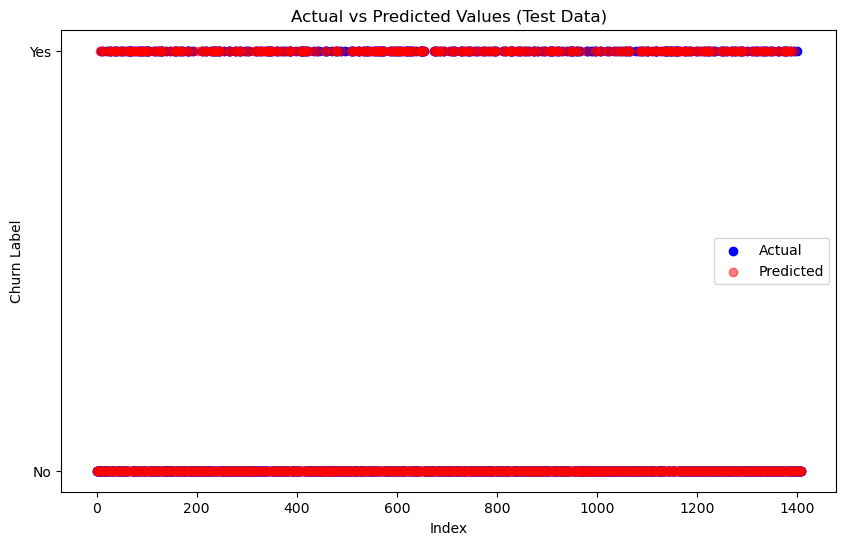

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and have the predicted values
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)  # or whichever model you are using


# Fit the model with training data

# Convert y_test and y_pred to NumPy arrays (for better compatibility)
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_np)), y_test_np, color='blue', label='Actual')
plt.scatter(range(len(y_pred_np)), y_pred_np, color='red', alpha=0.5, label='Predicted')

plt.title('Actual vs Predicted Values (Test Data)')
plt.xlabel('Index')
plt.ylabel('Churn Label')
plt.legend()
plt.show()

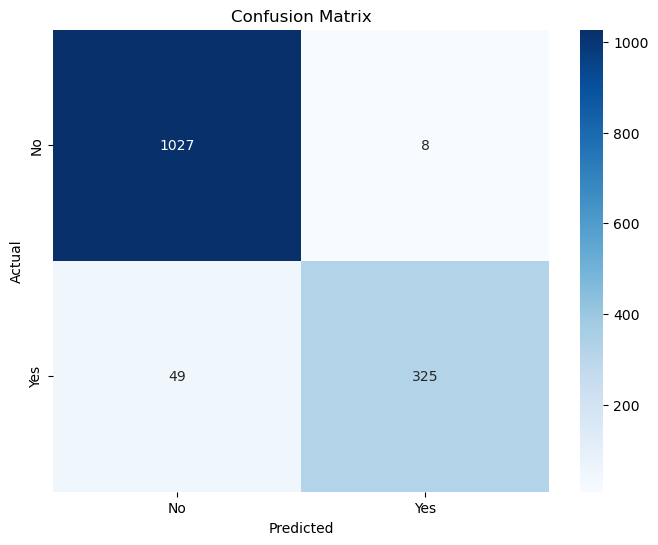

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


####  Summary
Cross validation score and xgb accuracy comes our to be 96% which is a high score and therefore this model is good for predicting the outcome i.e. churn label when the inputs are given to the model XGboost model. 

---